<a href="https://colab.research.google.com/github/Snoke9/MLaDA/blob/main/survive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 2
# Визуальный анализ данных
**Цель работы:** изучить программные средства, используемые для визуализации набора данных.

Выполним анализ набора данных «Выживаемость пациентов». Набор данных содержит информацию о выживаемости пациенток, перенесших операцию по поводу рака молочной железы. Набор содержит случаи из исследования, проводившегося с 1958 по 1970 год в больнице Биллингса Чикагского университета. Набор данных включает следующие атрибуты:

* **age** – возраст пациента на момент операции (целое число)
* **year** – год операции пациента (целое число)
* **nodes** – количество обнаруженных положительных подмышечных узлов (целое число)
* **survival** – статус выживания (целевая переменная), где 2 – означает, что пациент умер в течение 5 лет, а 1 – означает, что пациент прожил 5 лет или дольше.



### 1. Импортируем необходимые библиотеки

In [ ]:
import numpy as mp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Импортируем набор данных из файла haberman.csv и поместим его в объект DataFrame

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/haberman.csv')
data.head(10)

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


### 3. Получим сводную информацию по датафрейму

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       306 non-null    int64
 1   year      306 non-null    int64
 2   nodes     306 non-null    int64
 3   survival  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### 4. Визуализация количественных признаков



<Axes: >

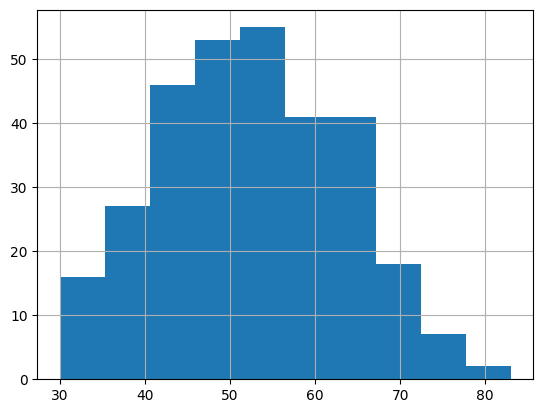

In [ ]:
#возраст пациентов
data['age'].hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'nodes'}>,
        <Axes: title={'center': 'survival'}>]], dtype=object)

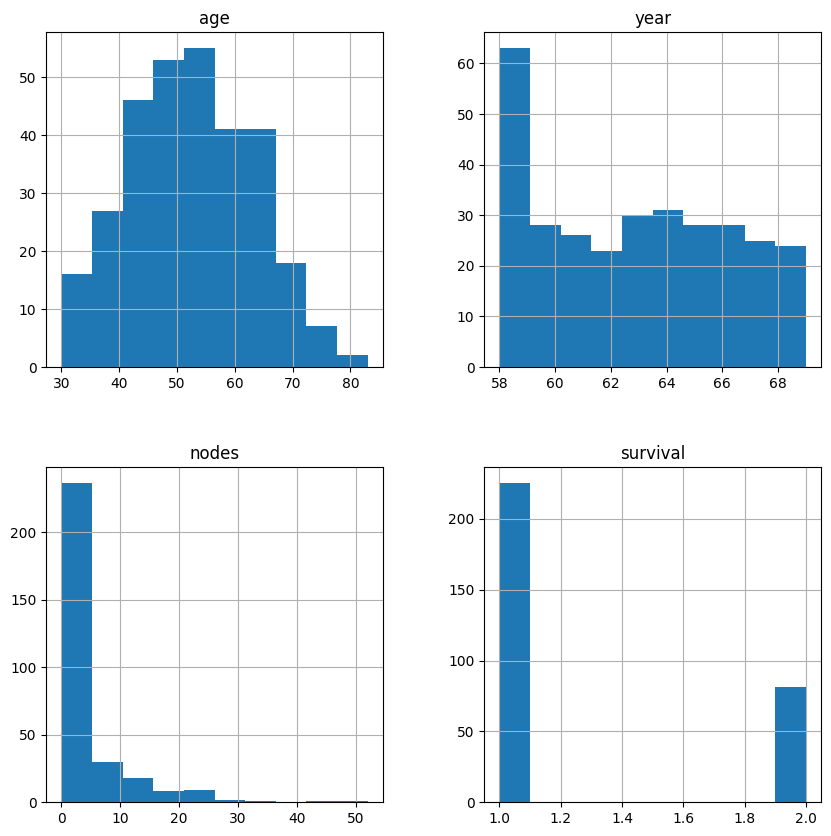

In [ ]:
data.hist(figsize=(10, 10))

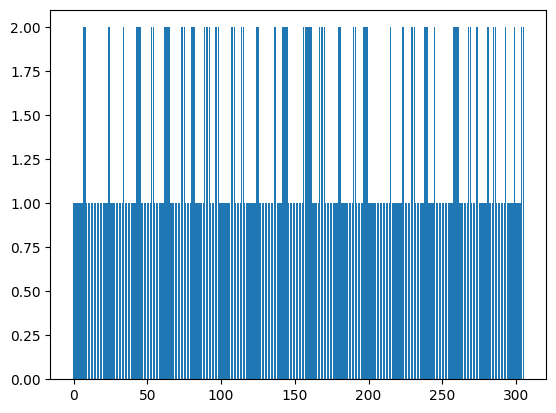

In [ ]:
plt.bar(data.index, data['survival'])
plt.show()

<BarContainer object of 49 artists>

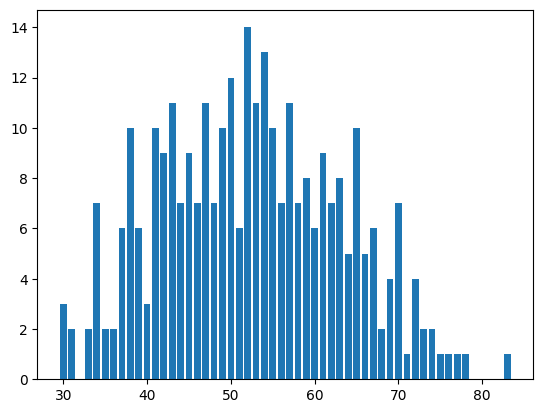

In [ ]:
#распределение пациентов по возрасту
hist = data['age'].value_counts()
plt.bar(hist.index, hist)

<Axes: ylabel='age'>

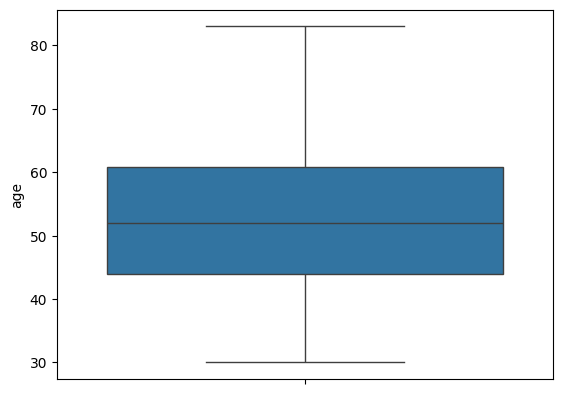

In [ ]:
sns.boxplot(data['age'])

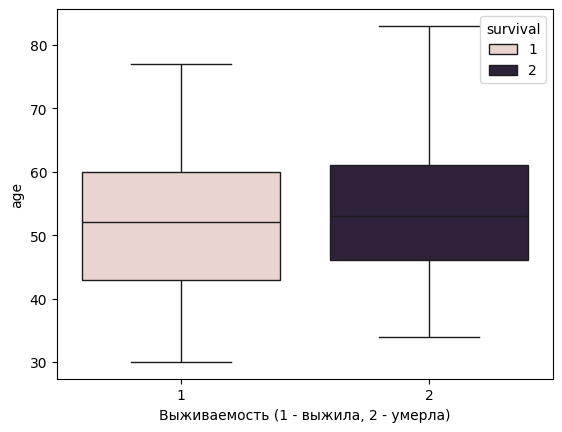

In [ ]:
sns.boxplot(x='survival', y='age', data=data, hue='survival')
plt.xlabel('Выживаемость (1 - выжила, 2 - умерла)')
plt.show()


### 5. Визуализация категориальных признаков

In [ ]:
#под категориальный признак подходит выживаемость пациентов
data['survival'].value_counts()

,count
survival,
1,225
2,81


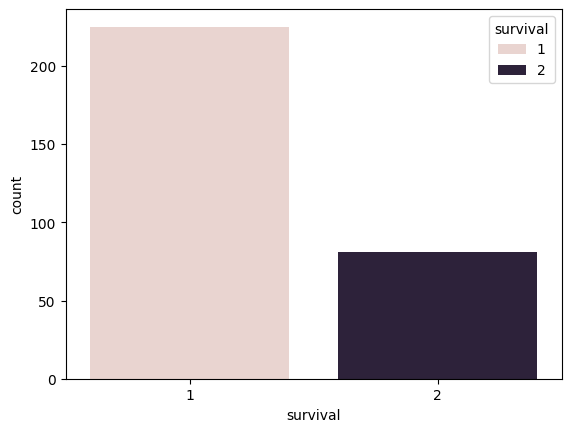

In [ ]:
#общее количество выживыших и умерших пациентов
sns.countplot(data, x='survival', hue='survival')
plt.show()

<Axes: xlabel='Узлы', ylabel='Выжившие'>

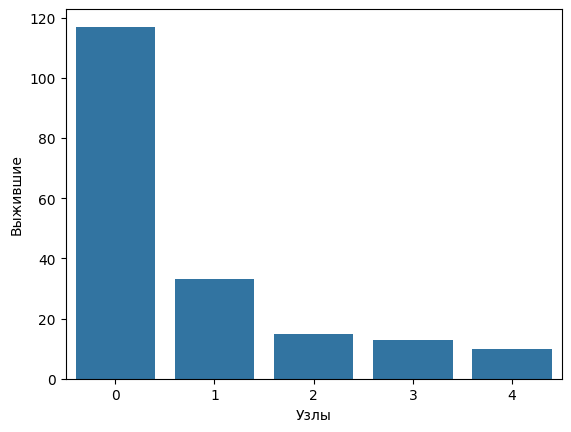

In [ ]:
#самые распространенные количества узлов у выживших пациентов
survived = data[data['survival'] == 1]
top_nodes = survived['nodes'].value_counts().nlargest(5).index
plt.ylabel('Выжившие')
plt.xlabel('Узлы')
sns.countplot(x='nodes', data=survived[survived['nodes'].isin(top_nodes)],
              order=top_nodes)


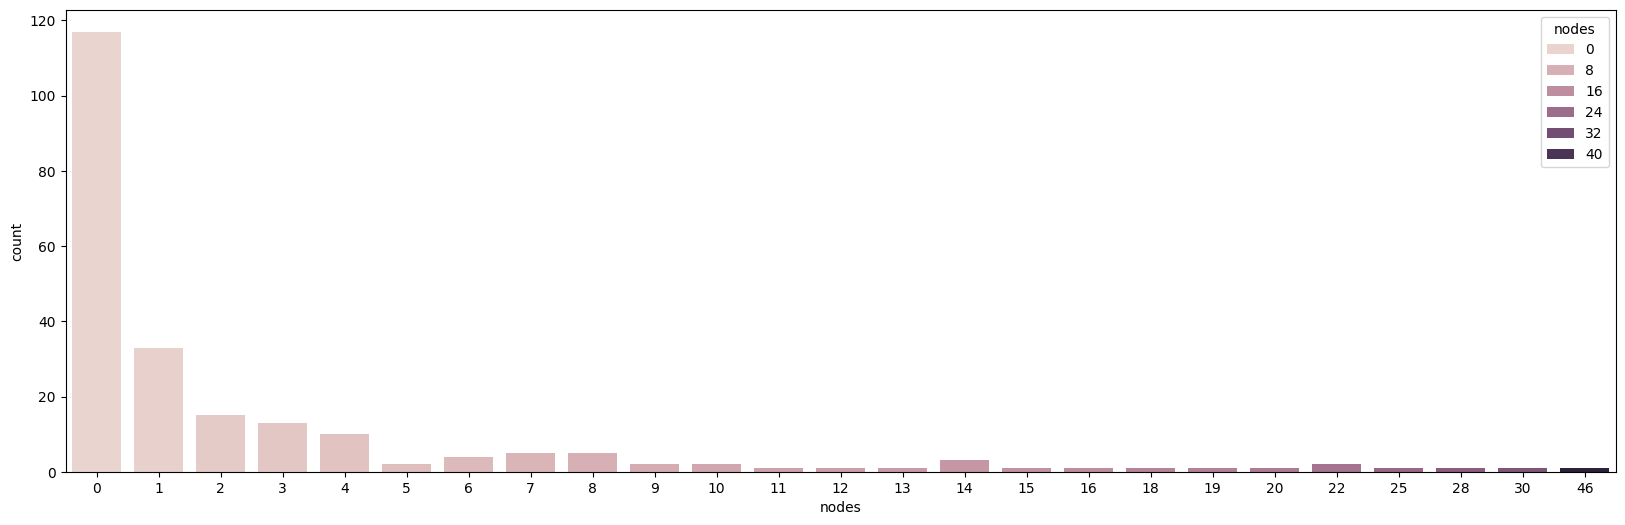

In [ ]:
#количество узлов у выживших пациентов
fig = plt.subplots(figsize = (20,6))
sns.countplot(survived, x='nodes', hue='nodes')
plt.show()

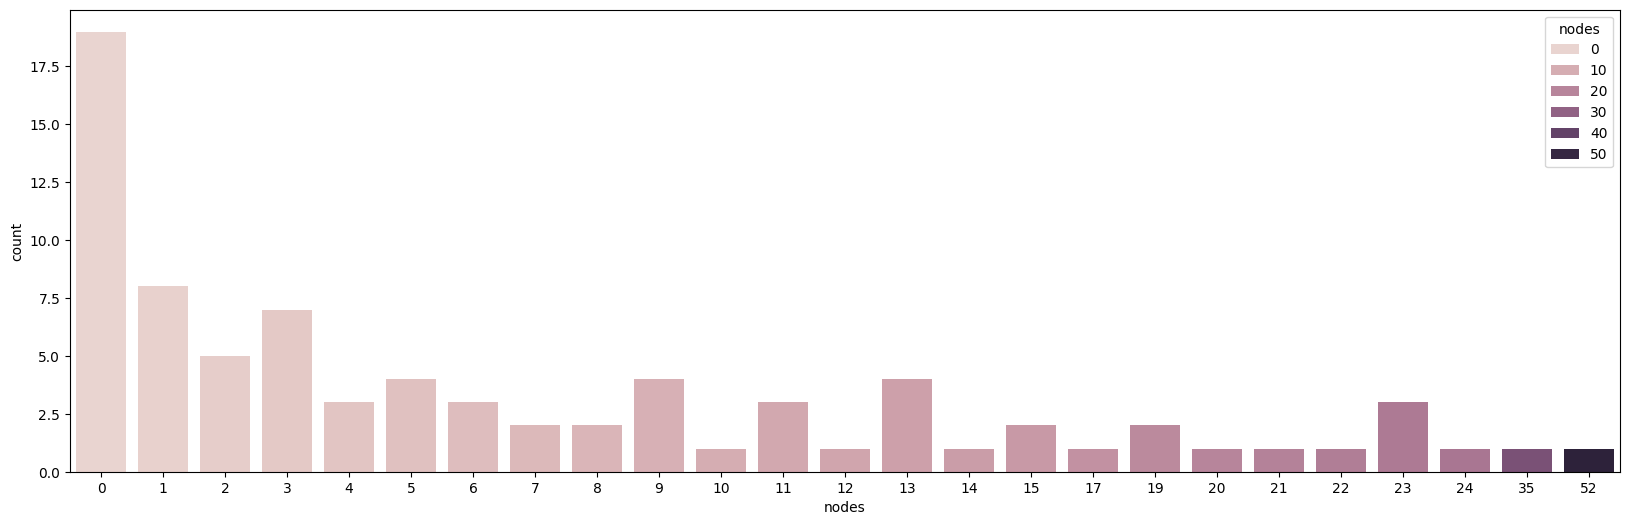

In [ ]:
#количество узлов у умерших пациентов
died = data[data['survival'] == 2]
fig = plt.subplots(figsize = (20,6))
sns.countplot(died, x='nodes', hue='nodes')
plt.show()

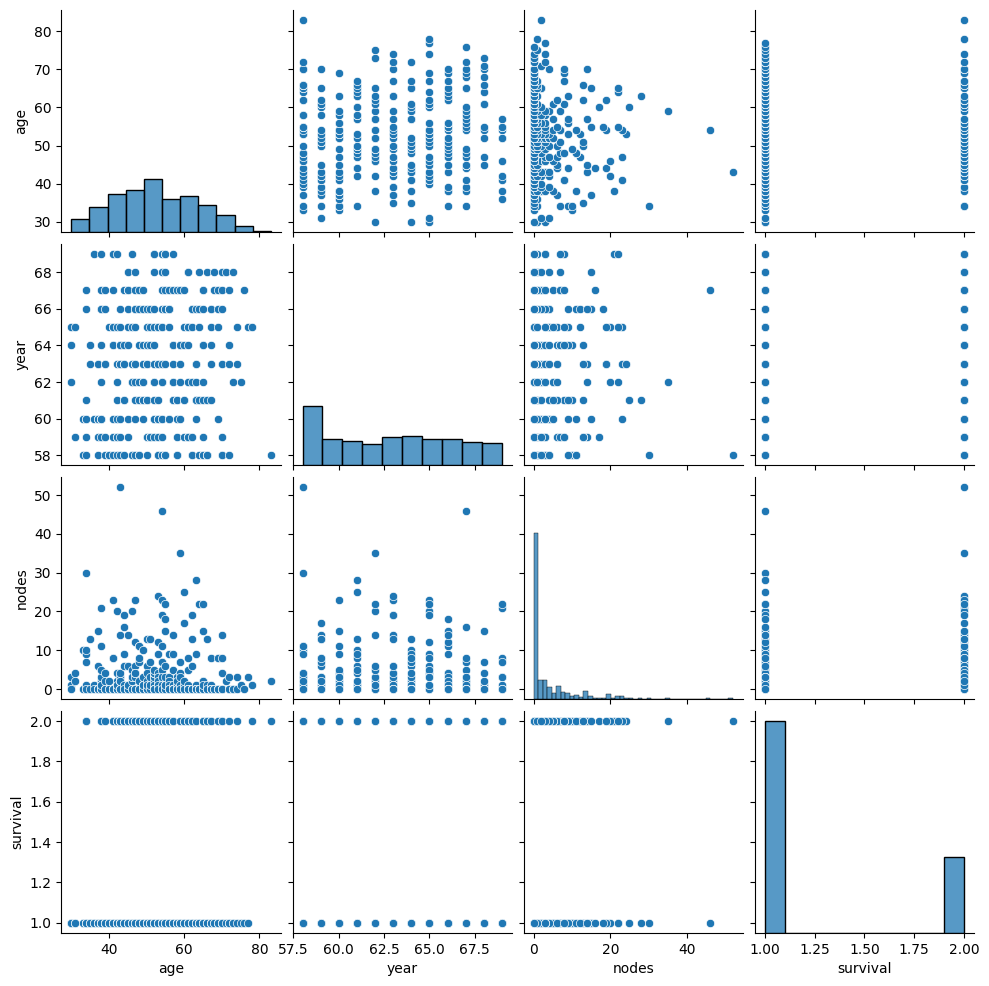

In [ ]:
#попарные распределения
sns.pairplot(data)

Text(0.5, 1.0, 'Распределение по двум признакам')

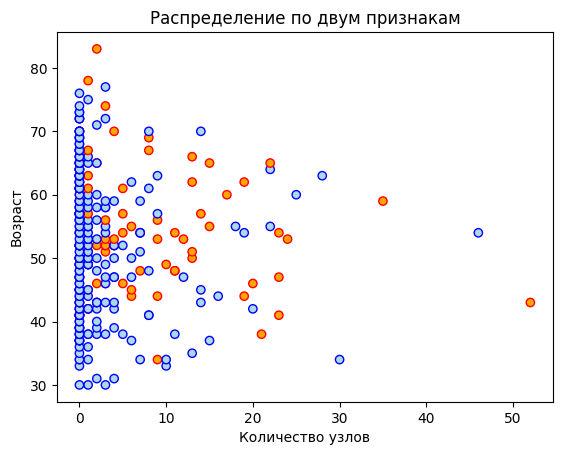

In [ ]:
plt.scatter(data['nodes'], data['age'],
            color=data['survival'].map({1: 'lightblue', 2: 'orange'}),
            edgecolors=data['survival'].map({1: 'blue', 2: 'red'}))
plt.xlabel('Количество узлов')
plt.ylabel('Возраст')
plt.title('Распределение по двум признакам')

### 5. Корреляция признаков



In [ ]:
data.corr()

,age,year,nodes,survival
age,1.000000,0.089529,-0.063176,0.067950
year,0.089529,1.000000,-0.003764,-0.004768
nodes,-0.063176,-0.003764,1.000000,0.286768
survival,0.067950,-0.004768,0.286768,1.000000


<Axes: >

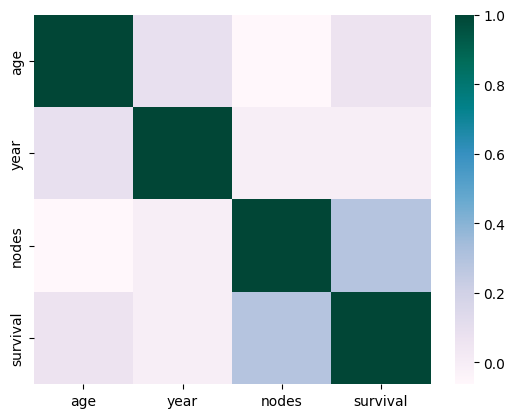

In [ ]:
sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn)